In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



## Import Data

In [3]:
# read in loan data
df = pd.read_csv('Data/loan.csv')

In [4]:
# read in cleaned train and test data; concatenate to single df
final_train_df = pd.read_csv('Data/train.csv')
final_test_df = pd.read_csv('Data/test.csv')
cl_df = pd.concat([final_train_df, final_test_df], ignore_index=True)

In [5]:
# final_train_df.shape  #(979767, 109)
# final_test_df.shape   #(326589, 109)
# cleaned_df.shape      #(1306356, 109)

In [6]:
# list all column names
for col_name in cl_df.columns: 
    print(col_name)


acc_now_delinq
annual_inc
avg_cur_bal
bc_open_to_buy
bc_util
delinq_2yrs
delinq_amnt
dti
funded_amnt
funded_amnt_inv
inq_last_6mths
installment
int_rate
loan_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mort_acc
mths_since_recent_bc
mths_since_recent_inq
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_op_past_12m
open_acc
pct_tl_nvr_dlq
percent_bc_gt_75
pub_rec
pub_rec_bankruptcies
revol_bal
revol_util
tot_coll_amt
tot_cur_bal
tot_hi_cred_lim
total_acc
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit
total_rev_hi_lim
acc_open_past_24mths
addr_state_NY
addr_state_Rare
addr_state_CA
addr_state_FL
addr_state_TX
emp_length_other
emp_length_2 years
emp_length_5 years
emp_length_Rare
emp_length_10+ years
emp_length_1 year
emp_length_3 years
emp_length_< 1 year
emp_length_4 years
emp_title_other
emp_title_Rare
grade_F
grade_B
grade_D
grade_C
grade_E
grade_A
grade_G
home_ownership_MO

### Purpose of loans

Text(0, 0.5, 'percentage of loans')

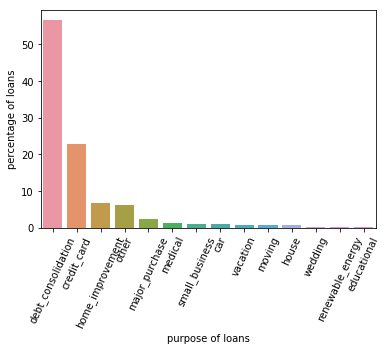

In [8]:
## Reason for loans
purpose_df = pd.DataFrame(df.purpose.value_counts(normalize=True)*100)
purpose_df.reset_index(inplace=True)
ax = sns.barplot(x='index',y='purpose',data=purpose_df)
#
plt.xticks(rotation=65)
ax.set_xlabel("purpose of loans")
ax.set_ylabel("percentage of loans")


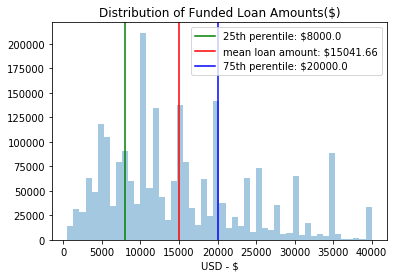

In [112]:
### Loan amounts    Count vs. Amount
funded_amount = df['funded_amnt'].values

ax = sns.distplot(funded_amount, kde = False)
ax.axvline(np.percentile(funded_amount,[25]), color='g',
              label = "25th perentile: ${}".format(np.percentile(funded_amount,[25])[0],2))
ax.axvline(funded_amount.mean(),color='r',
             label='mean loan amount: ${}'.format(round(funded_amount.mean(),2)))
ax.axvline(np.percentile(funded_amount,[75]), color='b',
             label = "75th perentile: ${}".format(np.percentile(funded_amount,[75])[0],2))
ax.set_title("Distribution of Funded Loan Amounts($)")
ax.set_xlabel("USD - $")
ax.legend()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

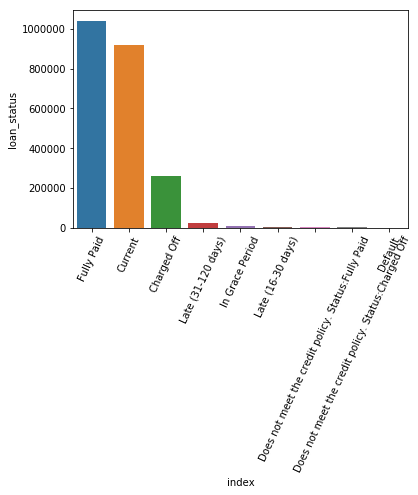

In [101]:
## Loan status Loan status vs counts
status_df = pd.DataFrame(df.loan_status.value_counts())
status_df.reset_index(inplace=True)
sns.barplot(x='index',y='loan_status',data=status_df)
plt.xticks(rotation=65)


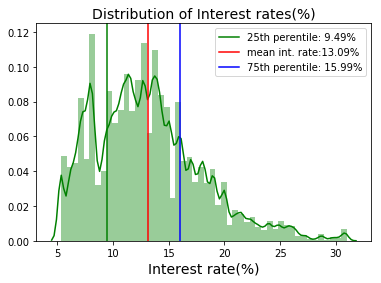

In [111]:
interest_rate = df['int_rate'].values

ax = sns.distplot(interest_rate, color="green")
ax.set_title("Distribution of Interest rates(%)", fontsize=14,)
ax.set_xlabel("%",fontsize=14)
ax.axvline(np.percentile(interest_rate,[25]),
              label = "25th perentile: {}%".format(np.percentile(interest_rate,[25])[0],2),
             color='g')
ax.axvline(interest_rate.mean(),color='r',
              label='mean int. rate:{}%'.format(round(interest_rate.mean(),2)))
ax.axvline(np.percentile(interest_rate,[75]),
             label = "75th perentile: {}%".format(np.percentile(interest_rate,[75])[0],2),
             color='b')
ax.set_xlabel("Interest rate(%)",fontsize=14)
ax.legend()


# g1 = sns.countplot(x="int_round", data=df_loan, 
#                   color='blue')
# g1.set_xlabel("Loan Interest Rate", fontsize=16)
# g1.set_ylabel("Count", fontsize=16)
# g1.set_title("Interest Rate Distribuition", fontsize=20)



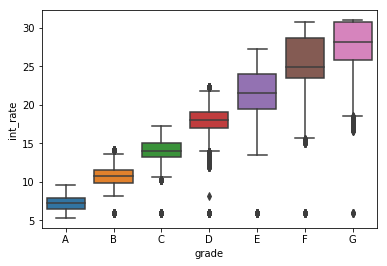

In [5]:
## Interest rates by lending club grade

## LC assigns grade to loans
sns.boxplot(x='grade', y='int_rate', data=df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], showfliers=True)



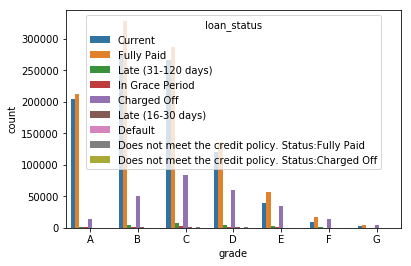

In [117]:
sns.countplot(x='grade', hue='loan_status', data=df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# title
# size
# legend



In [ ]:
boostrap on the mean default rate

In [ ]:
## column names / variables

In [20]:
### Tell about data set:  what are loans used for and how much are they for? What are the interest rate given? 
### Who gets loans: jobs, homeowners/renters, income brakets?



In [ ]:
fyi:
    
    client purposes for loan
    distributions of loan ammount and interest
    
    

In [ ]:
which vars will be most interesting:


amount of loan vs. default
interest rate vs. default
income level vs default - low, med, hi



In [ ]:
Crosstab - Loan Status by Grade¶

Interest Rate by Grade and Loan_status

In [ ]:
# plt.figure(figsize = (12,16))

# plt.subplot(311)
# g = sns.countplot(x="loan_status", data=df_loan, 
#                   color='blue')
# g.set_xticklabels(g.get_xticklabels(),rotation=45)
# g.set_xlabel("Loan Status Categories", fontsize=12)
# g.set_ylabel("Count", fontsize=15)
# g.set_title("Loan Status Types Distribution", fontsize=20)
# sizes=[]
# for p in g.patches:
#     height = p.get_height()
#     sizes.append(height)
#     g.text(p.get_x()+p.get_width()/2.,
#             height + 3,
#             '{:1.2f}%'.format(height/total*100),
#             ha="center", fontsize=12) 
# g.set_ylim(0, max(sizes) * 1.10)

# plt.subplot(312)
# g1 = sns.boxplot(x="loan_status", y="int_round", data=df_loan, 
#                  color='blue')
# g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
# g1.set_xlabel("Loan Status Categories", fontsize=12)
# g1.set_ylabel("Interest Rate Distribution", fontsize=15)
# g1.set_title("Loan Status by Interest Rate", fontsize=20)

# plt.subplot(313)
# g2 = sns.boxplot(x="loan_status", y="loan_amnt", data=df_loan, 
#                  color='blue')
# g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
# g2.set_xlabel("Loan Status Categories", fontsize=15)
# g2.set_ylabel("Loan Amount Distribution", fontsize=15)
# g2.set_title("Loan Status by Loan Amount", fontsize=20)

# plt.subplots_adjust(hspace = 0.7,top = 0.9)

# plt.show()

In [ ]:
# # emp_lenght description: 
# # Employment length in years. Possible values are between 0 and 10 where 0 means 
# # less than one year and 10 means ten or more years. 

# emp_ord = ['< 1 year', '1 year', '2 years', '3 years',
#            '4 years', '5 years', '6 years', '7 years',
#            '8 years', '9 years', '10+ years']

# fig, ax = plt.subplots(2,1, figsize=(14,11))
# g = sns.boxplot(x="emp_length", y="int_rate", data=df_loan,
#                 ax=ax[0], color='blue',
#                 order=emp_ord)

# z = sns.violinplot(x="emp_length", y="loan_amnt",data=df_loan, 
#                    ax=ax[1], color='blue',
#                    order=emp_ord)
               
# plt.legend(loc='upper left')
# plt.show()
